## PE File Malware Detection in Python


In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Loading dataset from training
data = pd.read_csv('copy_dataset_malwares_5.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name','Malware'], axis=1)
y = data['Malware']

In [3]:
data.head()

,Name,e_magic,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,...,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfHeapReserve,Malware
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,34404,6,1236512358,240,34,523,8,0,...,5,2,1024,295281,274432,2,32832,524288,1048576,1
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,332,5,1365109591,224,258,267,9,0,...,5,0,1024,0,442368,2,33088,1048576,1048576,1
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,332,6,1438777028,224,14,267,6,0,...,4,0,4096,0,49152,2,0,1048576,1048576,1
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,332,7,1354629311,224,783,267,2,22,...,4,0,1024,14174816,1032192,2,32768,2097152,1048576,1
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,332,7,1386631250,224,783,267,2,56,...,4,0,1024,0,110592,2,0,2097152,1048576,1


In [4]:
data.columns

Index(['Name', 'e_magic', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion', 'MajorSubsystemVersion',
       'MinorSubsystemVersion', 'SizeOfHeaders', 'CheckSum', 'SizeOfImage',
       'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SizeOfHeapReserve', 'Malware'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

X_train.head()

,e_magic,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,...,MajorOperatingSystemVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfHeapReserve
17996,23117,34404,2,1375747120,240,34,523,11,0,36352,...,4,6,0,512,56317,57344,3,34144,4194304,1048576
15684,23117,332,3,1377174991,224,8450,267,11,0,1536,...,4,4,0,512,53909,32768,3,34112,1048576,1048576
7091,23117,332,3,708992537,224,33167,267,2,25,561152,...,4,4,0,4096,1215280277,1175552,2,0,1048576,1048576
5374,23117,332,3,1396988441,224,271,267,6,0,49152,...,4,4,0,4096,106294,73728,2,0,1048576,1048576
174,23117,332,2,1299829942,224,33166,267,15,25,13824,...,4,4,0,1024,34535,69632,2,0,1048576,1048576


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [7]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,e_magic,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,...,MajorOperatingSystemVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfHeapReserve
0,0.0,2.537439,-1.502404,0.312966,2.293870,-0.579573,2.537439,0.241076,-0.286175,-0.028958,...,-0.020526,1.511205,-0.016723,-0.079674,-0.233333,-0.055252,1.745517,0.974551,2.294950,-0.01653
1,0.0,-0.394100,-1.005719,0.317846,-0.366751,0.307755,-0.394098,0.241076,-0.286175,-0.029697,...,-0.020526,-0.947089,-0.016723,-0.079674,-0.233338,-0.056272,1.745517,0.972598,-0.017584,-0.01653
2,0.0,-0.394100,-1.005719,-1.965776,-0.366751,2.913754,-0.394098,-0.716608,1.113211,-0.017828,...,-0.020526,-0.947089,-0.016723,0.149854,2.211087,-0.008844,-0.354780,-1.108361,-0.017584,-0.01653
3,0.0,-0.394100,-1.005719,0.385562,-0.366751,-0.554585,-0.394098,-0.290971,-0.286175,-0.028687,...,-0.020526,-0.947089,-0.016723,0.149854,-0.233232,-0.054572,-0.354780,-1.108361,-0.017584,-0.01653
4,0.0,-0.394100,-1.502404,0.053507,-0.366751,2.913649,-0.394098,0.666714,1.113211,-0.029436,...,-0.020526,-0.947089,-0.016723,-0.046884,-0.233377,-0.054742,-0.354780,-1.108361,-0.017584,-0.01653


In [8]:
skpca = PCA(n_components=15)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.8317684048524276


In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

In [10]:
# Random Forest Classifier
model_rf = RFC(n_estimators=100, random_state=0, 
               oob_score=True, max_depth=16, 
               max_features='sqrt')
model_rf.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred_rf = model_rf.predict(X_test_pca)

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0)

# AdaBoost Classifier (without specifying base_estimator)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# Extra Trees Classifier
model_et = ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# List of models
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Training and evaluating each model
for model, model_name in zip(models, model_names):
    model.fit(X_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_pred, y_test))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       982
           1       0.99      0.99      0.99      2941

    accuracy                           0.98      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.98      0.98      0.98      3923


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1003
           1       0.99      0.99      0.99      2920

    accuracy                           0.98      3923
   macro avg       0.97      0.97      0.97      3923
weighted avg       0.98      0.98      0.98      3923



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       991
           1       0.98      0.98      0.98      2932

    accuracy                           0.97      3923
   macro avg       0.96      0.96      0.96      3923
weighted avg       0.97      0.97      0.97      3923


Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       952
           1       0.99      0.97      0.98      2971

    accuracy                           0.97      3923
   macro avg       0.96      0.97      0.97      3923
weighted avg       0.97      0.97      0.97      3923


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       989
           1       0.99      0.99      0.99      2934

    accuracy                           0.98      3923
   ma

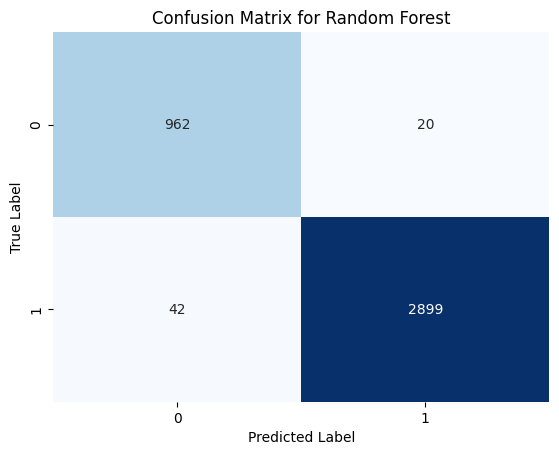

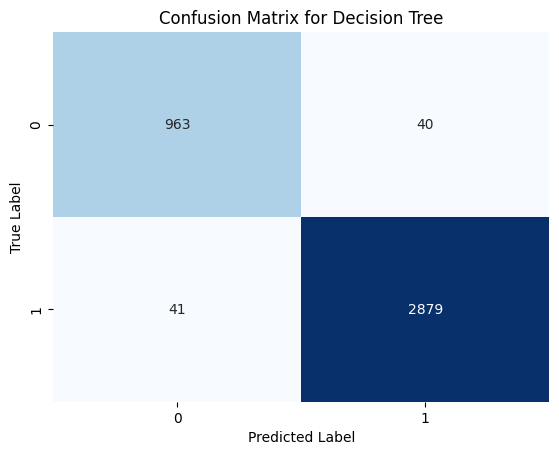

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


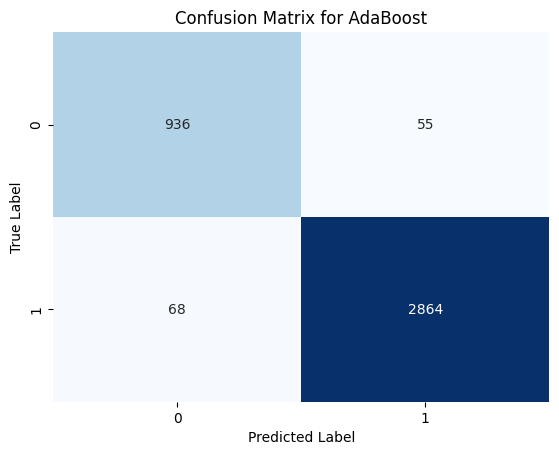

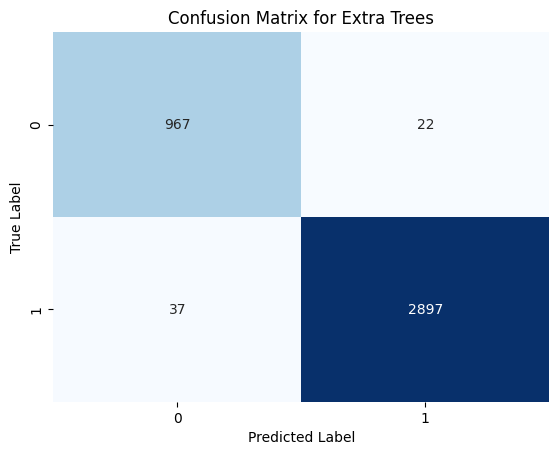

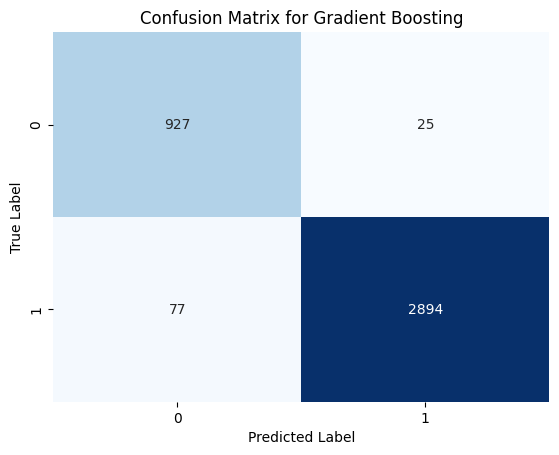

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = [
    RFC(n_estimators=100, random_state=0, oob_score=True, max_depth=16, max_features='sqrt'),
    DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
    ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
]

# Model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train, predict, and evaluate each model
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_pca, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_pca)
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [12]:
from sklearn.pipeline import Pipeline
import joblib

# Define the pipeline
pipe_rf = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_rf)])
pipe_dt = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_dt)])
pipe_ada = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_ada)])
pipe_et = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_et)])
pipe_gbm = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_gbm)])

# List of pipelines
pipelines = [pipe_rf, pipe_dt, pipe_ada, pipe_et, pipe_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train and evaluate each pipeline
for pipeline, model_name in zip(pipelines, model_names):
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Save the pipeline
    joblib.dump(pipeline, f'{model_name}_pipeline.pkl')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


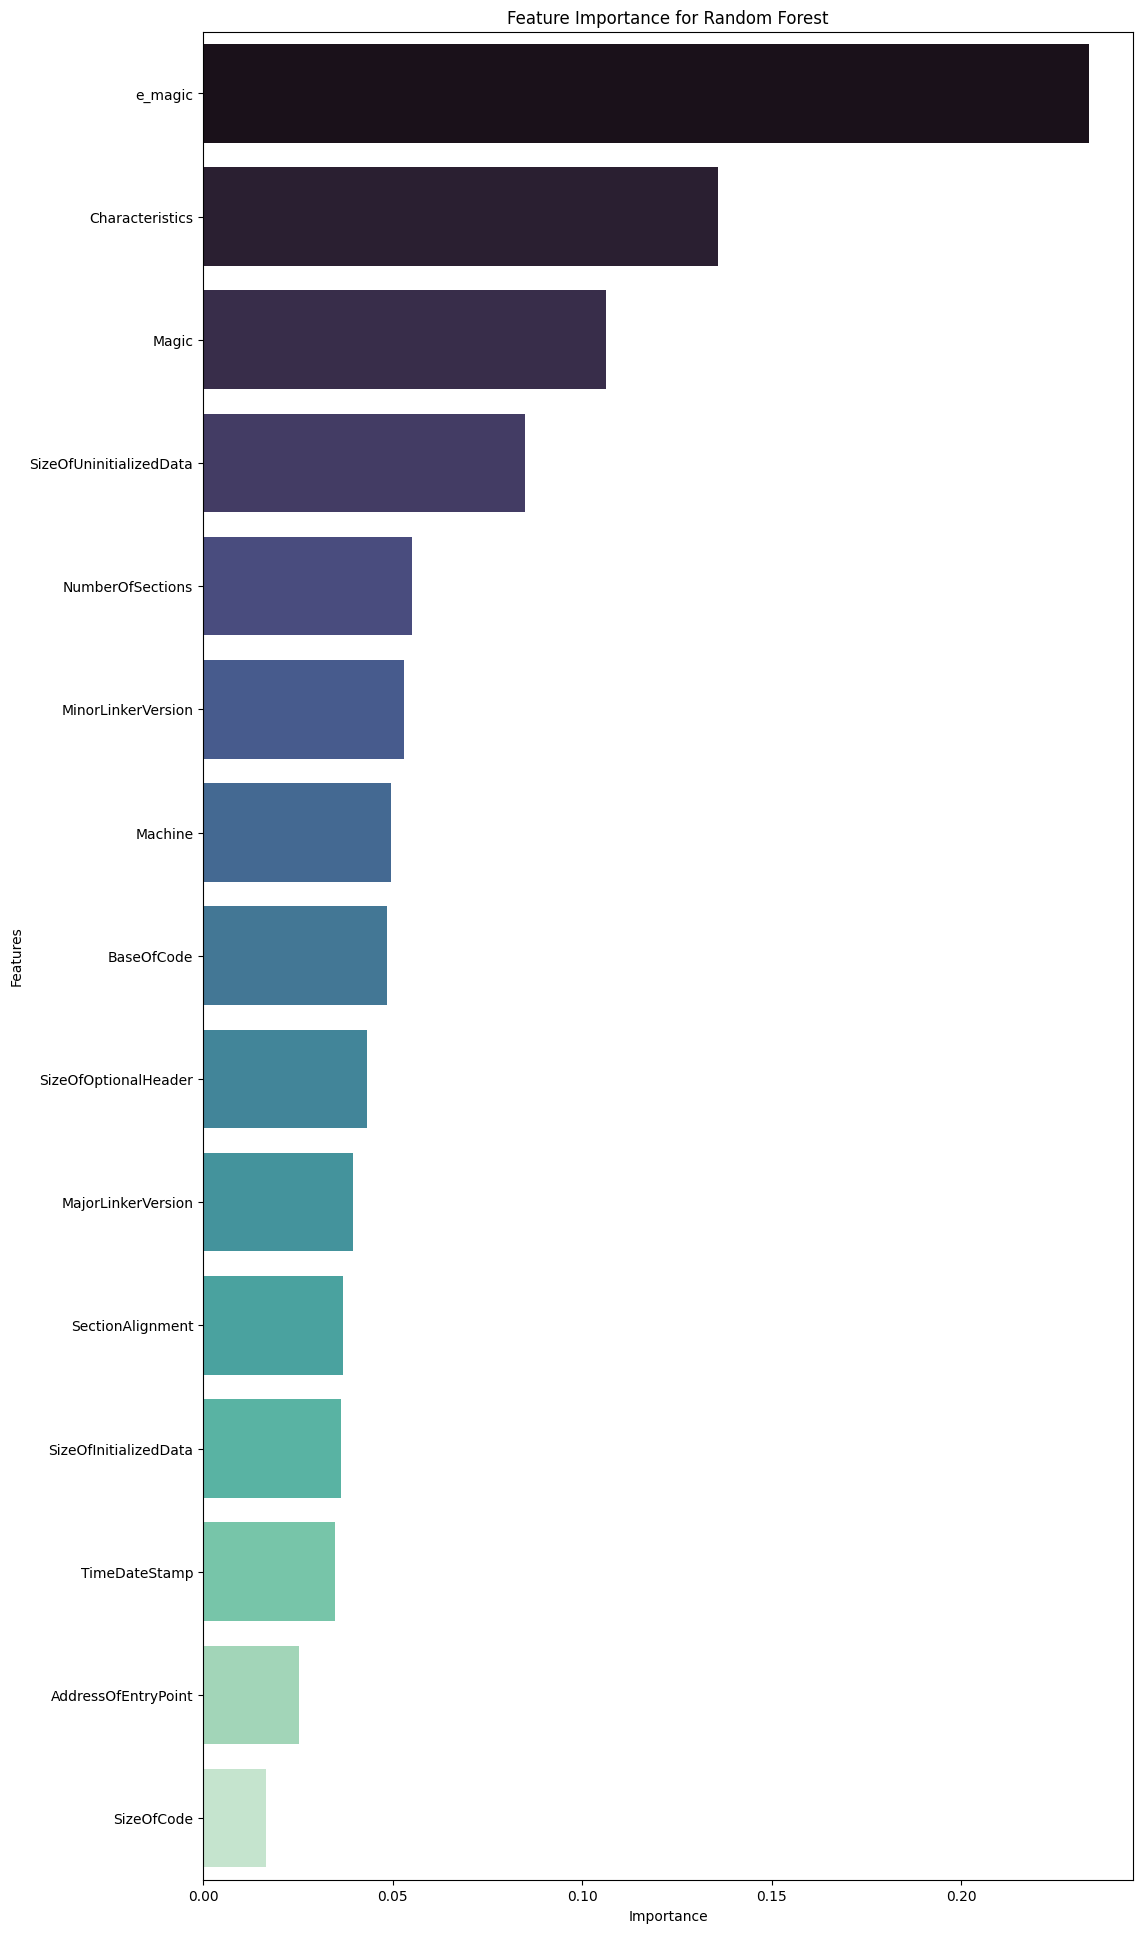

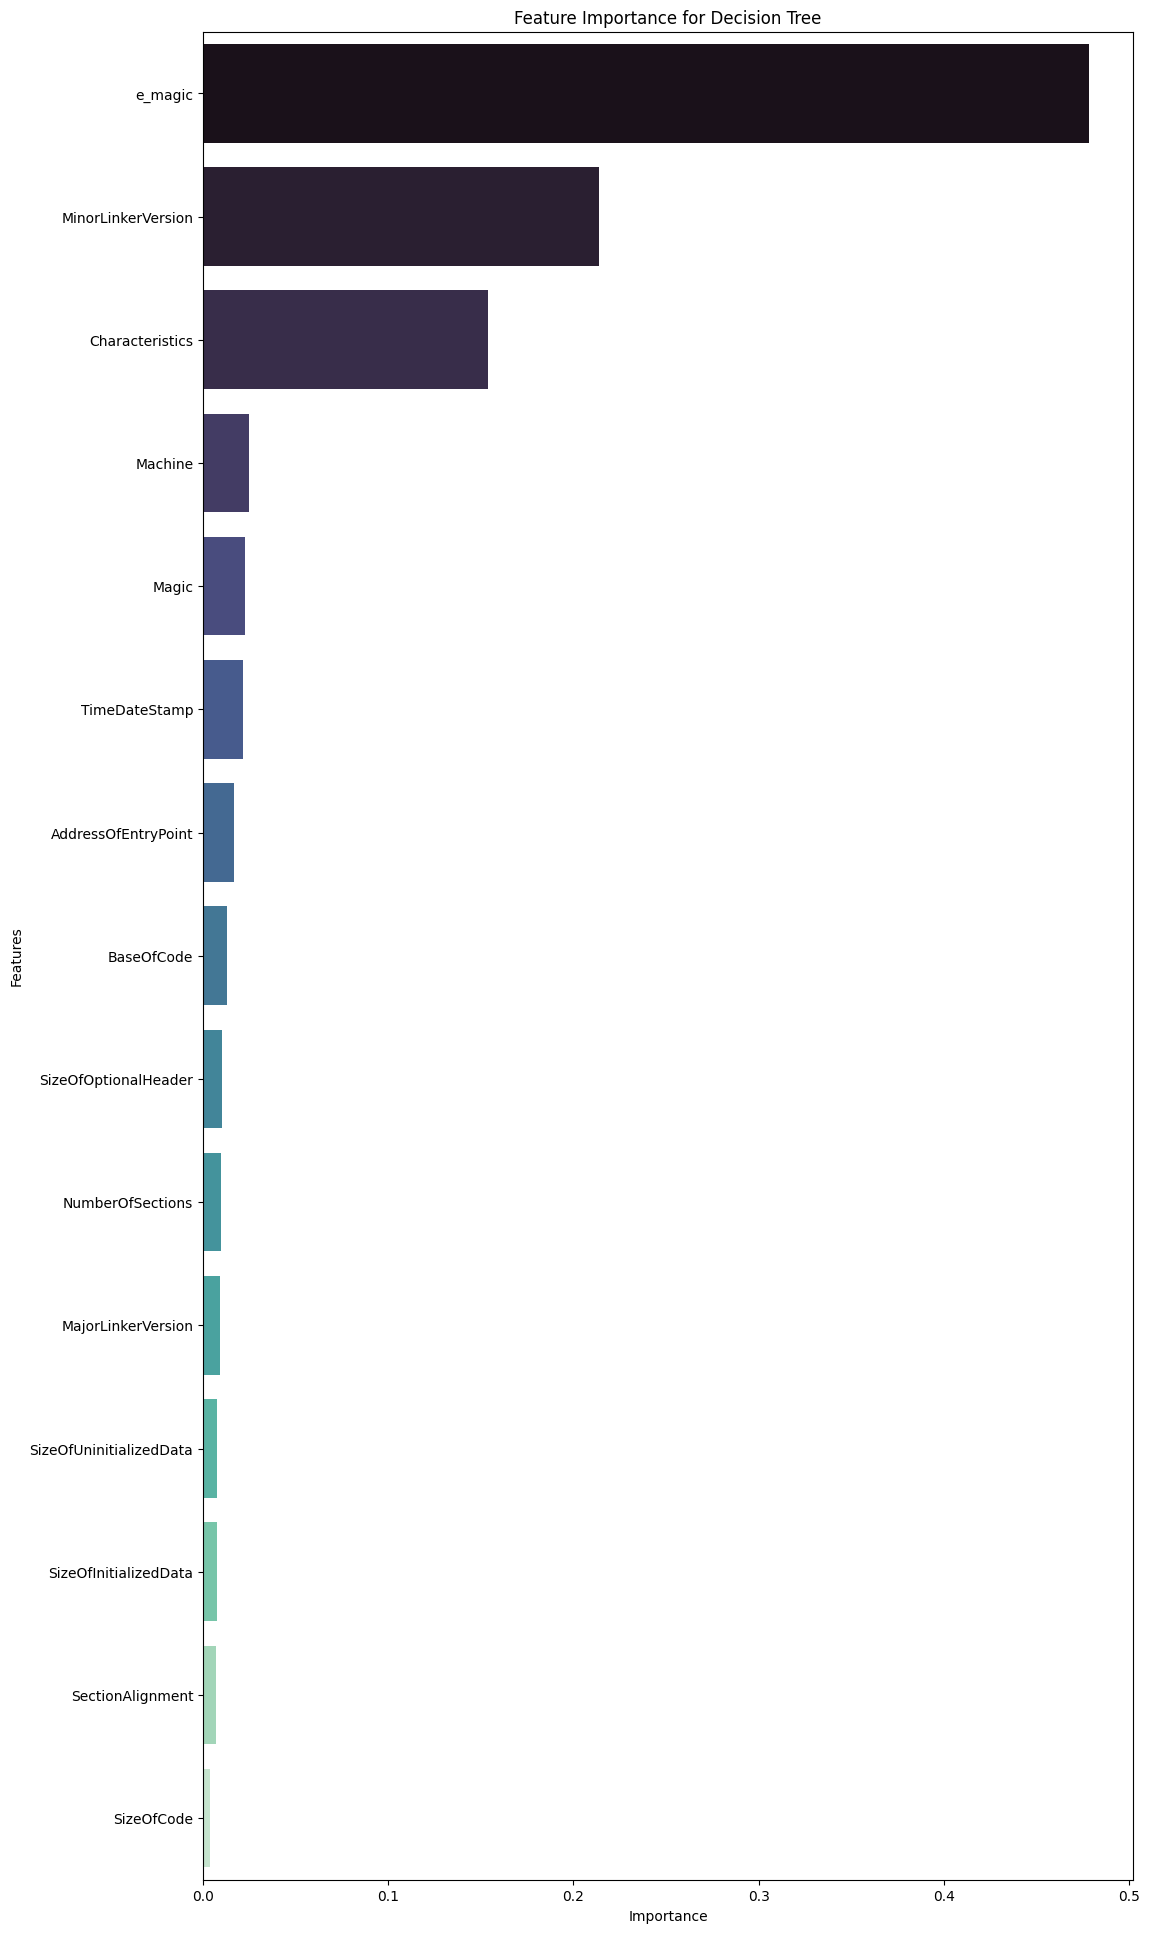

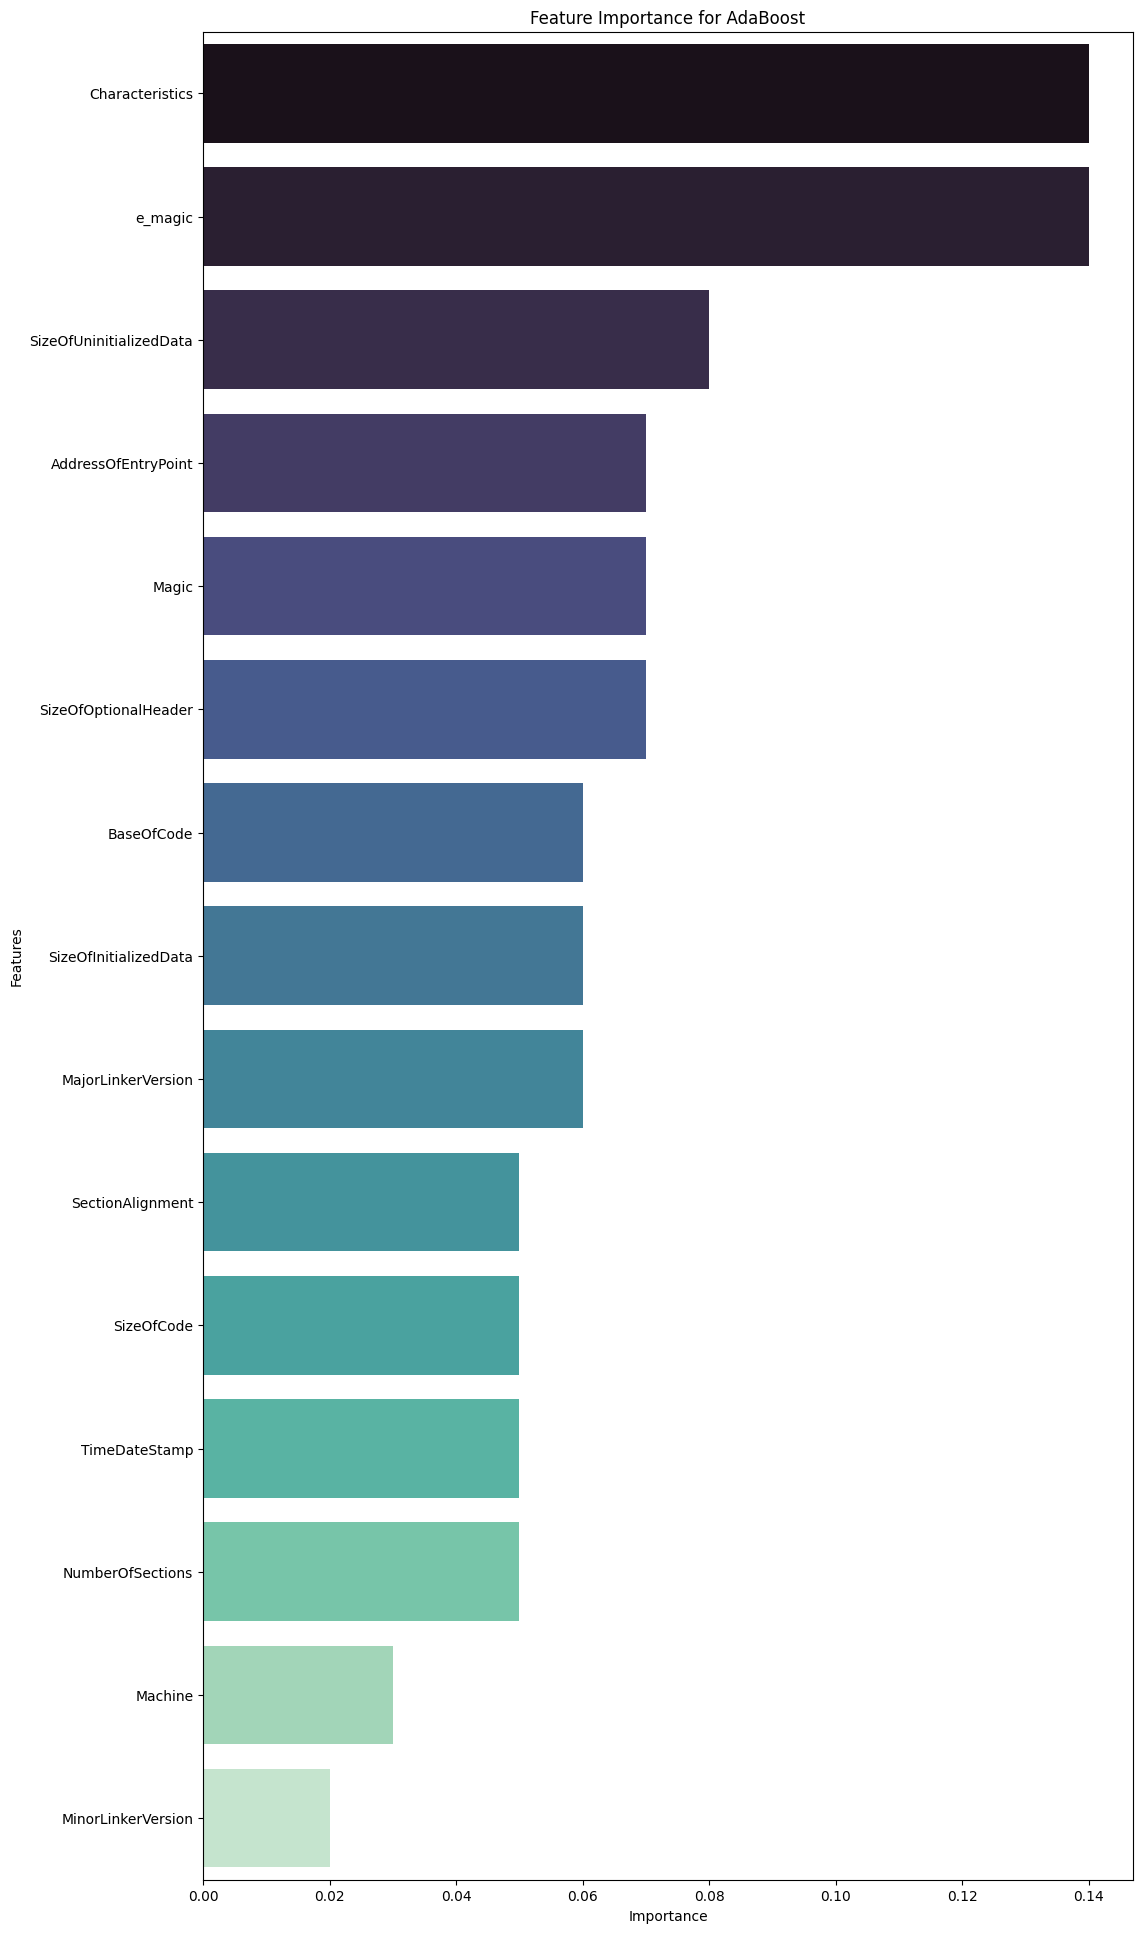

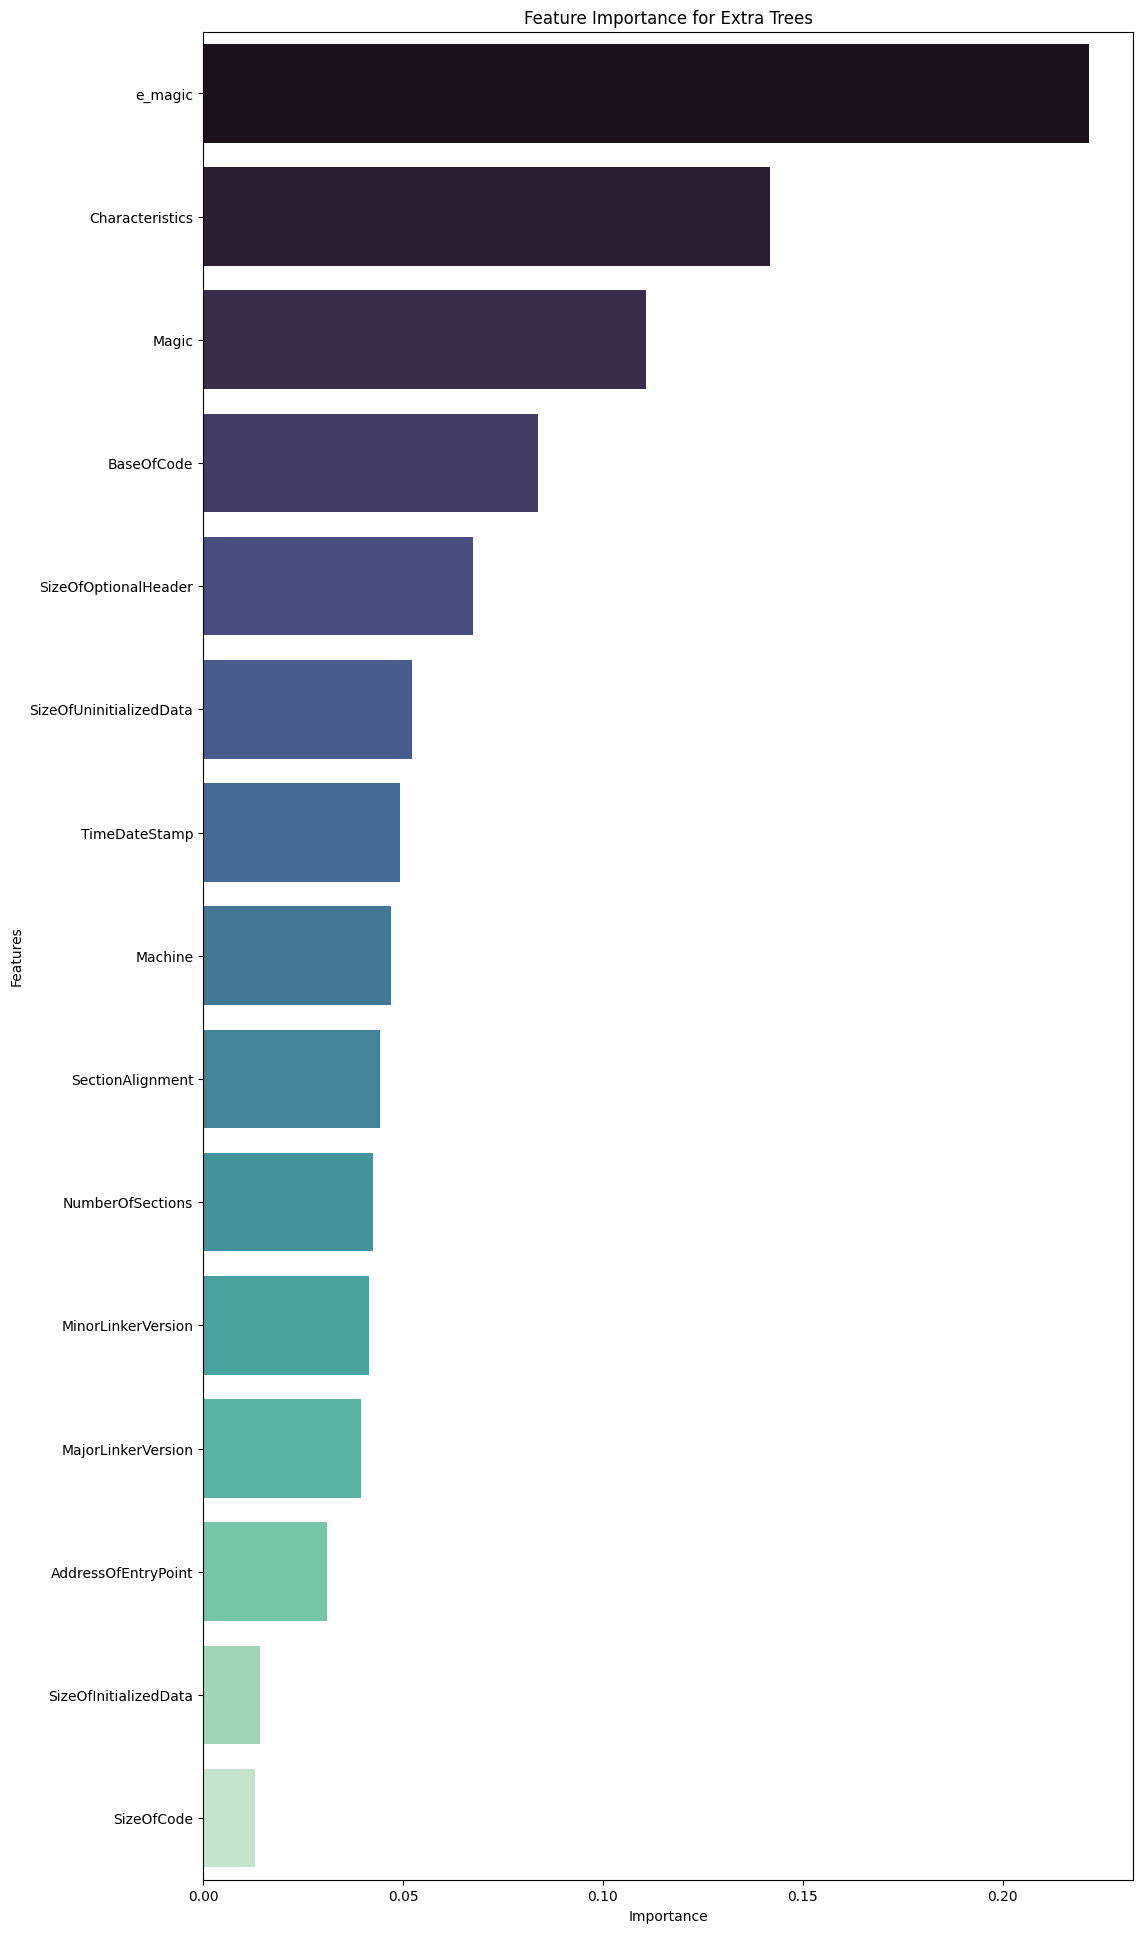

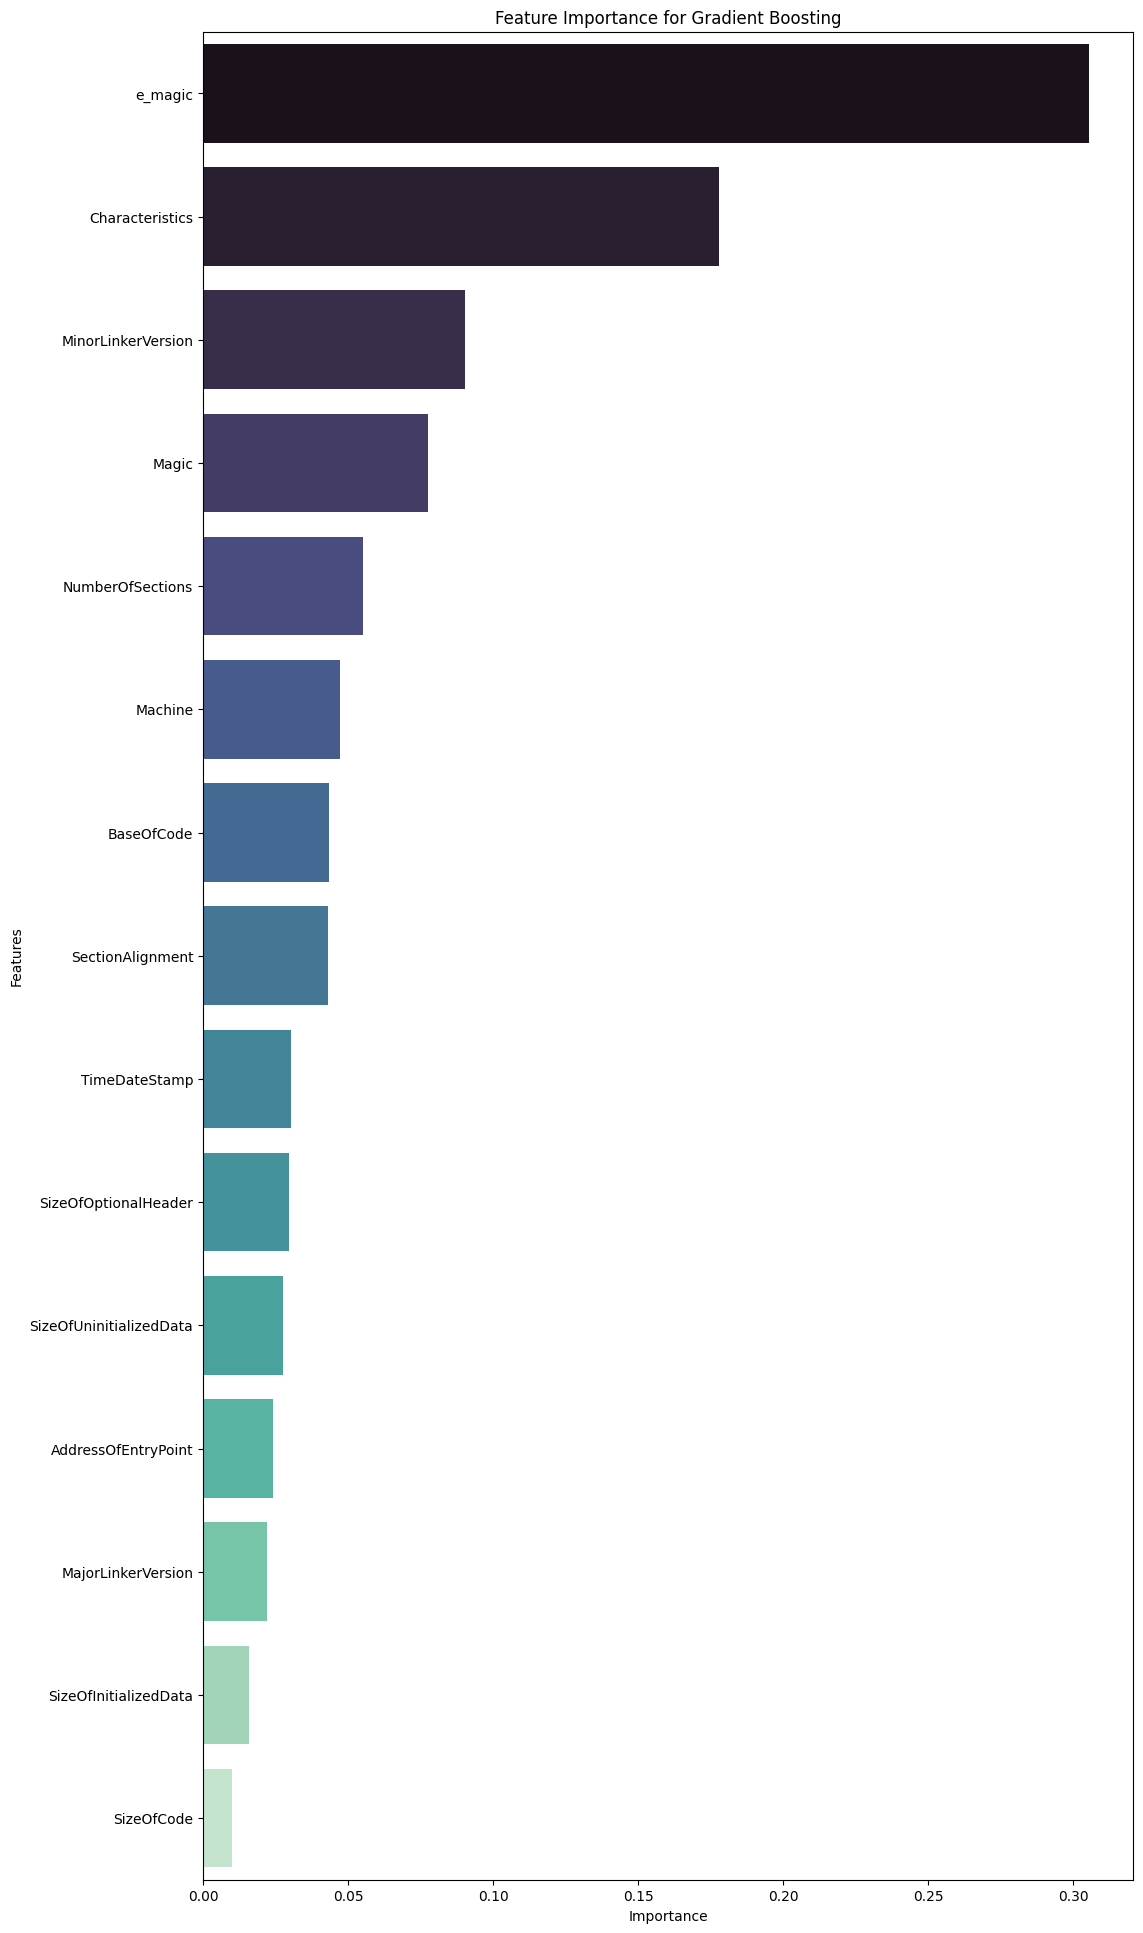

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their corresponding names
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Plot feature importance for each model
for model, model_name in zip(models, model_names):
    # Get feature importances
    importance = model.feature_importances_
    
    # Create a dictionary mapping each feature to its importance value
    importance_dict = {X.columns[i]: importance[i] for i in range(len(importance))}
    
    # Sort the dictionary based on importance values
    sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    
    # Plot the sorted feature importances using a bar plot
    plt.figure(figsize=(12, 24))
    sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], hue=list(sorted_dict.keys())[::-1], palette='mako', legend=False)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [14]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_5.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'Random Forest_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.920000  0.080000   
1                                 vlc-3.0.2-win64.exe  0.509216  0.490784   
2                                       stinger32.exe  0.430000  0.570000   
3                                SpotifyFullSetup.exe  0.620000  0.380000   
4                                    uftp_english.exe  0.266330  0.733670   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.257551  0.742449   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.432398  0.567602   
7                                   reverse_shell.exe  0.263248  0.736752   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.022660  0.977340   
9                             ScratchInstaller1.4.exe  0.241547  0.758453   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.002721  0.997279   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.021037  0.978963   

In [20]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_5.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'Gradient Boosting_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred, columns=[f'{model_name}_0', f'{model_name}_1']))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)


                                                 Name  Random Forest_0  \
0                                  Skype-8.10.0.9.exe         0.999848   
1                                 vlc-3.0.2-win64.exe         0.902596   
2                                       stinger32.exe         0.733558   
3                                SpotifyFullSetup.exe         0.991366   
4                                    uftp_english.exe         0.053481   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...         0.000757   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...         0.944917   
7                                   reverse_shell.exe         0.009817   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...         0.000043   
9                             ScratchInstaller1.4.exe         0.997726   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...         0.000025   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...         0.000028   
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [16]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_5.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Random Forest_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)


                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.920000  0.080000
1                                 vlc-3.0.2-win64.exe  0.509216  0.490784
2                                       stinger32.exe  0.430000  0.570000
3                                SpotifyFullSetup.exe  0.620000  0.380000
4                                    uftp_english.exe  0.266330  0.733670
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.257551  0.742449
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.432398  0.567602
7                                   reverse_shell.exe  0.263248  0.736752
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.022660  0.977340
9                             ScratchInstaller1.4.exe  0.241547  0.758453
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.002721  0.997279
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.021037  0.978963
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [17]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_5.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Gradient Boosting_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.999848  0.000152
1                                 vlc-3.0.2-win64.exe  0.902596  0.097404
2                                       stinger32.exe  0.733558  0.266442
3                                SpotifyFullSetup.exe  0.991366  0.008634
4                                    uftp_english.exe  0.053481  0.946519
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.000757  0.999243
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.944917  0.055083
7                                   reverse_shell.exe  0.009817  0.990183
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.000043  0.999957
9                             ScratchInstaller1.4.exe  0.997726  0.002274
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.000025  0.999975
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.000028  0.999972
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [18]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_5.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('AdaBoost_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.499376  0.500624
1                                 vlc-3.0.2-win64.exe  0.482788  0.517212
2                                       stinger32.exe  0.497560  0.502440
3                                SpotifyFullSetup.exe  0.505423  0.494577
4                                    uftp_english.exe  0.489358  0.510642
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.491304  0.508696
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.489358  0.510642
7                                   reverse_shell.exe  0.488292  0.511708
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.483999  0.516001
9                             ScratchInstaller1.4.exe  0.487063  0.512937
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.484948  0.515052
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.486229  0.513771
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [19]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_5.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Extra Trees_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.329079  0.670921
1                                 vlc-3.0.2-win64.exe  0.187950  0.812050
2                                       stinger32.exe  0.309085  0.690915
3                                SpotifyFullSetup.exe  0.481534  0.518466
4                                    uftp_english.exe  0.071966  0.928034
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.123623  0.876377
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.062928  0.937072
7                                   reverse_shell.exe  0.148702  0.851298
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.094397  0.905603
9                             ScratchInstaller1.4.exe  0.069794  0.930206
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.078141  0.921859
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.036568  0.963432
12  3ec4cb928846f8298e5a13b3e96bfc2a70